# Email Spam Classifier


In [42]:
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv('spam.csv',encoding='Windows-1252')

In [44]:
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
283,ham,Okie...,NaN,NaN,NaN
4568,ham,At WHAT TIME should i come tomorrow,NaN,NaN,NaN
3282,ham,Hey tmr maybe can meet you at yck,NaN,NaN,NaN
2832,spam,You've won tkts to the EURO2004 CUP FINAL or å...,NaN,NaN,NaN
4124,ham,May b approve panalam...but it should have mor...,NaN,NaN,NaN


In [45]:
df.shape

(5572, 5)

In [46]:
# 1. Data cleaning
# 2. Eda 
# 3. Text preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. deploy

# 1. Data cleaning

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [48]:
# drop last 3 colum
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [49]:
df.sample(5)

,v1,v2
967,ham,What do u want when i come back?.a beautiful n...
1565,ham,"The &lt;#&gt; g that i saw a few days ago, th..."
3702,ham,How is my boy? No sweet words left for me this...
3027,ham,You have got tallent but you are wasting.
1217,ham,"Damn, can you make it tonight or do you want t..."


In [50]:
# renaming the cols
df.rename(columns={"v1":'target',"v2":'text'},inplace=True)

In [51]:
df.sample(5)

,target,text
737,spam,Hi. Customer Loyalty Offer:The NEW Nokia6650 M...
4685,ham,But pls dont play in others life.
5417,ham,Nope. I just forgot. Will show next week
1634,spam,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ..."
2655,ham,Great! I have to run now so ttyl!


In [52]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [53]:
df["target"] = encoder.fit_transform(df["target"])

In [54]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [56]:
# check for duplicate values
df.duplicated().sum()

403

In [57]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [58]:
df.duplicated().sum()

0

In [59]:
df.shape

(5169, 2)

# 2.EDA (Exporatry Data analysis)

In [60]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

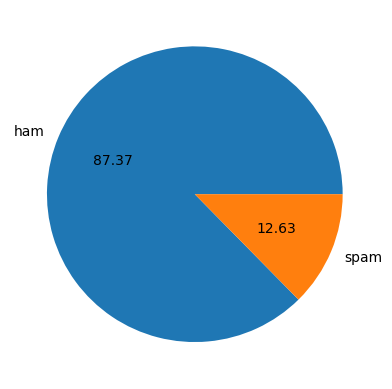

In [62]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%.2f")
plt.show()

In [63]:
# Data is imbalanced

In [64]:
import nltk

In [65]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [66]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [67]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [68]:
df['num_characters'] = df['text'].apply(len)

In [69]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [70]:
# number of words
df['num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [71]:
df.head()

,target,text,num_characters,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [72]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [73]:
df.head()

,target,text,num_characters,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [74]:
df[['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [75]:


#ham
df[df['target'] ==0][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [76]:
# spam
df[df['target'] ==1][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [77]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

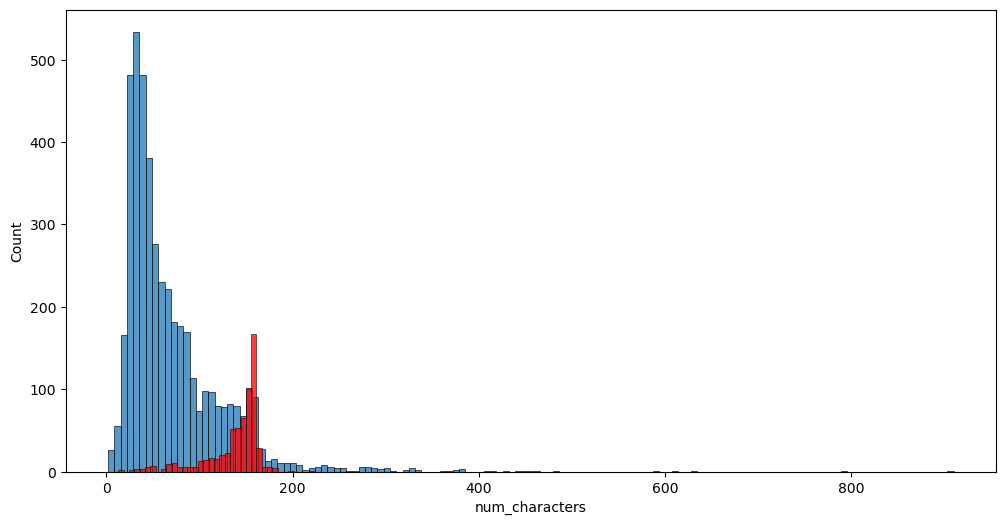

In [78]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']== 0]['num_characters'])
sns.histplot(df[df['target']== 1]['num_characters'],color='red')


<AxesSubplot:xlabel='num_word', ylabel='Count'>

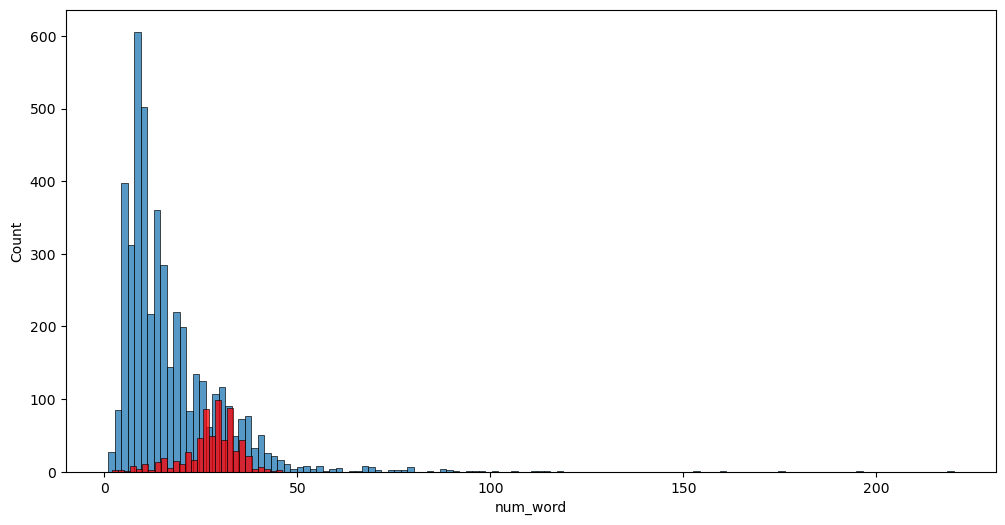

In [79]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']== 0]['num_word'])
sns.histplot(df[df['target']== 1]['num_word'],color='red')


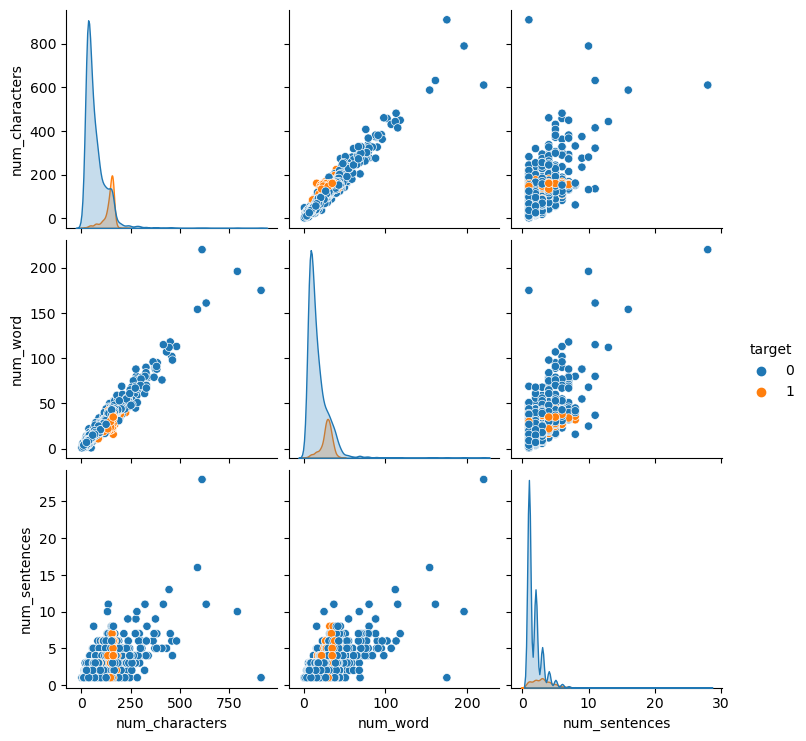

In [80]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

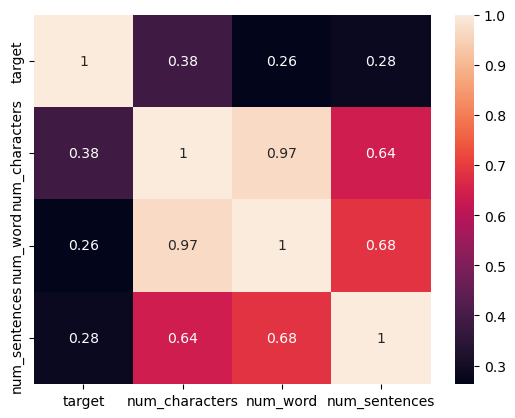

In [81]:
sns.heatmap(df.corr(),annot=True)

# 3. Data preprocessing

1.Lower case
2.Tokenization
3.Removing special characters
4.Removing stop words and punctuation
5.stemming

In [89]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [90]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text) # the test is coverted in list
    
    y = []
    for i in text:
        if i.isalnum():      # Alphanumeric
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [91]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [92]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [93]:
df['transformed_text'] = df['text'].apply(transform_text)

In [94]:
df.head()

,target,text,num_characters,num_word,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [95]:
from wordcloud import WordCloud # used to represnt the most important word of spam message 
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")) # generate is used 


In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building  Using Multinomial Naive Bayes Algorithm 

We Use Naive Bayes Because It work on probablity Distribution , So In This we are going to count the frequency of each word and 
then apply Multinomial Naive bayes For finding the probablity of that message to Ham or Spam .


We can use many other algo as well but we are more concern about The precision then accuracy , 
Other Algorithm such as 
1) Support Vector Machine 
2) Random Forest 3
3) KNN Algorithm 


From This algorithm We got an accuracy of 97% and precision of 100 %  

In [ ]:
We have use Bag Of Word  and tfidfVectorizer ---> They are the Text Vectorization that is used for converting alphanumeric
to Numeric value .  ( Nlp Do not understant the english language it only understant the 0&1)

We use Bag Of Word and Tfidf  which will count the frequency of Each word in The Message .


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
mnb = MultinomialNB()  # Multinomial Naive bayes algorithm 

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
# Now Using TFIDF 

In [ ]:
X1 = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
y1 =  df['target'].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=2)

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))